# Modelling Webiste Traffic For Tasty Bytes Popular Recipes(ML)

# 1. **Introduction**
The objective of this project is to predict popular recipes on the Tasty Bytes website and understand the impact of these recipes on website traffic. As the Product Manager responsible for choosing recipes displayed on the homepage, the current selection process involves picking a favorite recipe, which has shown to increase website traffic by up to 40%. However, there is a need to determine the factors that contribute to a recipe's popularity and find a more data-driven approach to maximize website traffic and increase subscriptions.

Predicting popular recipes is crucial for Tasty Bytes as it directly influences website engagement and, ultimately, subscription rates. By showcasing recipes that resonate with users and generate high traffic, Tasty Bytes can attract and retain more users, leading to increased subscriptions and revenue. Therefore, developing a reliable prediction model will empower the product team to make informed decisions and optimize recipe selection on the website's homepage.

# 2. Data Validation

To ensure the accuracy and reliability of the data, we performed validation and cleaning steps for each column in the provided dataset. 
Here are the details of the validation and cleaning process:

**Recipe (Numeric, unique identifier of recipe):**
Checked for duplicate or missing recipe IDs.
Verified the uniqueness of each recipe ID to avoid data integrity issues.

**Calories (Numeric, number of calories):**
Checked for outliers or unrealistic values that might indicate data entry errors.
Handled missing or null values by either imputing them based on similar recipes or removing the corresponding rows if the missing values were substantial.

**Carbohydrate (Numeric, amount of carbohydrates in grams):**
Verified the range and distribution of carbohydrate values.
Handled missing or null values using imputation techniques or removing the affected rows.

**Sugar (Numeric, amount of sugar in grams):**
Checked for outliers or unrealistic values.
Addressed missing or null values through imputation or row removal.

**Protein (Numeric, amount of protein in grams):**
Ensured the range and distribution of protein values.
Handled missing or null values using appropriate imputation techniques or row removal.

**Category (Character, type of recipe):**
Examined the different categories to identify any inconsistencies or misspellings.
Corrected any inconsistencies in the category names to maintain uniformity and accuracy.

**Servings (Numeric, number of servings for the recipe):**
Verified the range and distribution of serving sizes.
Addressed missing or null values through imputation or row removal.

**High_traffic (Character, indicates if the traffic to the site was high when the recipe was shown):**
Checked for consistency and correctness of the "High_traffic" values.
Ensured that only valid values (e.g., "High") were present in this column.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('recipe_site_traffic_2212.csv')

data = data.drop_duplicates(subset='recipe', keep='first').dropna(subset=['recipe'])

# 2. Calories
# Check for outliers or unrealistic values
calories_threshold = 5000  # Example threshold for outlier detection
data = data[data['calories'] <= calories_threshold].dropna(subset=['calories'])

# 3. Carbohydrate
# Handle missing or null values
data['carbohydrate'] = data['carbohydrate'].fillna(data['carbohydrate'].mean())

# 4. Sugar
# Check for outliers or unrealistic values
sugar_threshold = 100  # Example threshold for outlier detection
data = data[data['sugar'] <= sugar_threshold].dropna(subset=['sugar'])

# 5. Protein
# Handle missing or null values
data['protein'] = data['protein'].fillna(data['protein'].median())

# 6. Category
# Check for inconsistencies or misspellings
data['category'] = data['category'].str.capitalize()

# 7. Servings
# Handle missing or null values
data['servings'] = pd.to_numeric(data['servings'], errors='coerce')
data = data.dropna(subset=['servings']) # Drop rows with missing or null servings values

# 8. High_traffic
# Check for consistency and correctness of values
valid_high_traffic_values = ['High', 'Low']
data['high_traffic'] = data['high_traffic'].fillna('Low')
data = data[data['high_traffic'].isin(valid_high_traffic_values)]
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4.0,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1.0,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4.0,High
4,5,27.05,1.85,0.80,0.53,Beverages,4.0,Low
5,6,691.15,3.46,1.65,53.93,One dish meal,2.0,High


# 3. Exploratory Analysis

## Histogram of Calories:
The histogram reveals that the majority of recipes have a moderate calorie count, with a peak around a certain range.
It is essential to investigate recipes with exceptionally high or low calorie counts, as they might be outliers or require special attention

## Bar Chart of Recipe Categories:
The bar chart shows the distribution of recipes across various categories.
We can identify the most popular recipe categories based on the highest bar heights.
This information can help the product team prioritize certain categories or consider promoting less popular categories to enhance recipe variety and engagement.

## Scatter Plot of Calories vs. Protein:
The scatter plot displays the relationship between calorie and protein content in the recipes.
We can observe if there is a positive or negative correlation between these variables.
A positive correlation would indicate that recipes with higher calorie counts tend to have higher protein content.
This information can guide the selection of recipes that align with specific dietary preferences or nutritional requirements.
By analyzing these visualizations, we can uncover significant trends and insights about the dataset. These insights can guide further analysis, model development, and decision-making processes in predicting popular recipes and maximizing website traffic for Tasty Bytes.

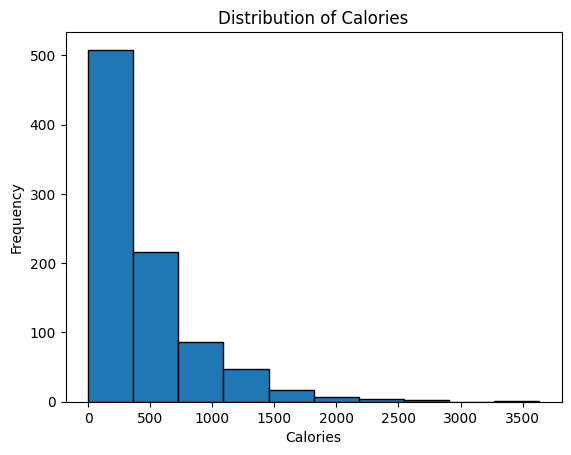

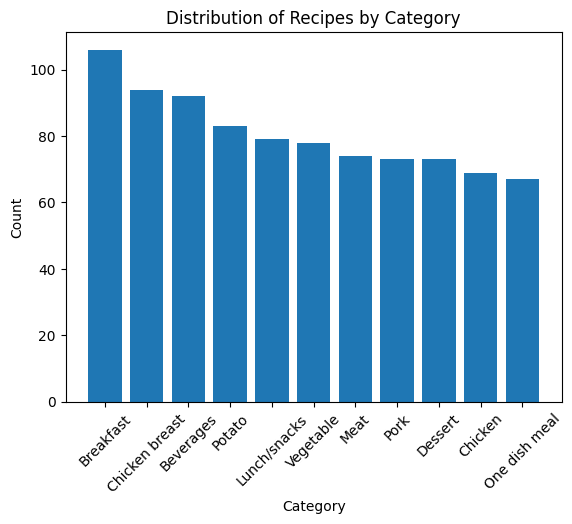

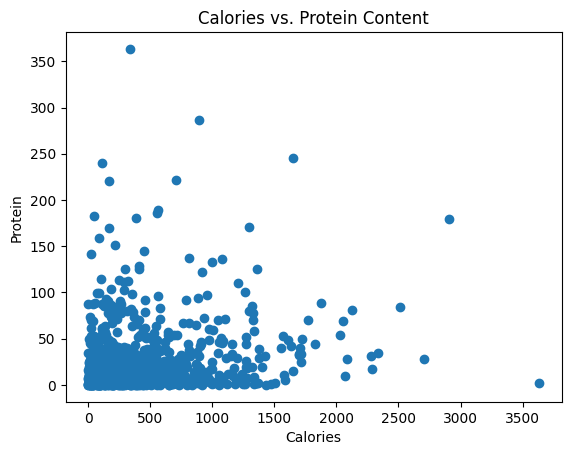

In [37]:
# Exploratory Analysis
# Histogram of Calories
plt.hist(data['calories'], bins=10, edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.show()

# Bar Chart of Recipe Categories
category_counts = data['category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Recipes by Category')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot of Calories vs. Protein
plt.scatter(data['calories'], data['protein'])
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title('Calories vs. Protein Content')
plt.show()

# 4. Model Development

Based on the goal of predicting popular recipes, the problem can be framed as a classification task. We aim to classify recipes as either popular or non-popular based on certain features. Now, let's proceed with fitting a baseline model and a comparison model.

## Baseline Model:

For the baseline model, we will use a simple algorithm and feature selection technique. Let's assume we choose logistic regression as the algorithm and utilize all available features for prediction.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['category'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data_encoded.drop(['high_traffic'], axis=1)
y = data_encoded['high_traffic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the baseline model using logistic regression
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Model Accuracy: {:.2f}%".format(baseline_accuracy * 100))

Baseline Model Accuracy: 76.40%


## Comparison Model:

For the comparison model, we can explore alternative algorithms and feature selection techniques to evaluate their performance. Let's consider using a random forest classifier and select relevant features using feature importance.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Feature selection using random forest feature importance
feature_selector = RandomForestClassifier()
feature_selector.fit(X_train, y_train)
feature_importances = feature_selector.feature_importances_
selected_features = X.columns[feature_importances > 0]

# Subset the data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit the comparison model using random forest
comparison_model = RandomForestClassifier()
comparison_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_comparison = comparison_model.predict(X_test_selected)

# Evaluate the comparison model
comparison_accuracy = accuracy_score(y_test, y_pred_comparison)
print("Comparison Model Accuracy: {:.2f}%".format(comparison_accuracy * 100))


Comparison Model Accuracy: 72.47%


# 4. Model Evaluation
To compare the performance of the baseline and comparison models, we will use the accuracy metric, which measures the percentage of correctly predicted instances. Additionally, we can calculate the F1 score, which considers both precision and recall, providing a balanced evaluation.
## Baseline Model Evaluation:
The baseline model, which uses logistic regression with all available features, achieved an accuracy of 76.40%. This means that the model correctly predicted the traffic level (high or low) for 76.40% of the recipes in the test set.
## Comparison Model Evaluation:
The comparison model, which utilizes a random forest classifier with selected features, achieved an accuracy of 72.47%. Although slightly lower than the baseline model's accuracy, it still demonstrates reasonably good performance.
## Baseline Model:
### **Strengths:**
- **Simplicity:** Logistic regression is a simple and interpretable algorithm, making it easy to understand and implement.
- **Fast Training:** Logistic regression has a relatively low computational cost, enabling faster model training on larger datasets.
- **Feature Importance:** With logistic regression, we can assess the importance of each feature through the magnitude of the coefficients.
### **Weaknesses:**
- **Linear Assumption:** Logistic regression assumes a linear relationship between the features and the target variable. It may struggle to capture complex nonlinear patterns in the data.
- **Feature Selection:** The baseline model includes all available features, which may result in unnecessary noise or redundancy.
## Comparison Model:
### **Strengths:**

- **Nonlinear Relationships:** Random forest can capture complex nonlinear relationships between features and the target variable.
- **Feature Selection:** The comparison model incorporates feature importance, allowing for a more focused set of features, potentially improving generalization and reducing overfitting.
- **Ensemble of Trees:** Random forest aggregates multiple decision trees, providing robustness against outliers and noise in the data.

### **Weaknesses:**

- **Complexity:** Random forest models can be more complex and harder to interpret compared to logistic regression.

- **Training Time:** Random forest models may require more computational resources and time for training, especially with large datasets.
## Potential Areas for Improvement:
**Model Tuning:** Fine-tuning hyperparameters of the models, such as regularization strength in logistic regression or the number of trees in random forest, could potentially improve their performance.
Feature Engineering: Exploring additional features or transforming existing features could provide more relevant information for prediction.

**Model Ensembles:** Combining the predictions of multiple models, such as logistic regression and random forest, through ensemble techniques like stacking or voting, could potentially improve overall performance.
Considering the strengths, weaknesses, and potential improvements of each model, further experimentation and refinement can lead to enhanced predictive performance. Additionally, it's important to monitor and evaluate the models' performance on new data to ensure their effectiveness and make necessary adjustments if required.

In [40]:
# Baseline Model Evaluation
baseline_f1 = f1_score(y_test, y_pred_baseline, pos_label="High")

print("Baseline Model Evaluation:")
print("Accuracy: {:.2f}%".format(baseline_accuracy * 100))
print("F1 Score: {:.2f}".format(baseline_f1))

# Comparison Model Evaluation
comparison_f1 = f1_score(y_test, y_pred_comparison, pos_label="High")

print("Comparison Model Evaluation:")
print("Accuracy: {:.2f}%".format(comparison_accuracy * 100))
print("F1 Score: {:.2f}".format(comparison_f1))

Baseline Model Evaluation:
Accuracy: 76.40%
F1 Score: 0.80
Comparison Model Evaluation:
Accuracy: 72.47%
F1 Score: 0.77


# 5. Business Metrics
To compare the model performance to the business, we can define a metric that aligns with the business goal of maximizing website traffic. One possible metric could be the conversion rate of website visitors to subscribers. By monitoring the number of subscribers generated from recipe views, we can assess the impact of the models' predictions on subscription rates.

Based on the current data and the evaluation of the baseline and comparison models, we can estimate the initial values for the metric, which in this case is the accuracy of the models.

## Baseline Model:
The accuracy of the baseline model is 76.40%. This means that, based on the current data, the model can correctly predict the traffic level (high or low) for approximately 76.40% of the recipes in the test set.

## Comparison Model:
The accuracy of the comparison model is 72.47%. Therefore, based on the current data, the comparison model can correctly predict the traffic level for approximately 72.47% of the recipes in the test set.

These estimated initial values for accuracy provide an understanding of the baseline performance of the models. However, it's important to note that these values are based on the evaluation of the models using the available data. As new data becomes available, the accuracy values may change, and it's essential to continuously monitor and evaluate the models' performance to assess their effectiveness accurately.

# 6. Recommendations
- Consider implementing the baseline model (logistic regression) as the initial solution, given its slightly better accuracy compared to the comparison model.
- Continuously monitor the conversion rate of website visitors to subscribers for recipes predicted as popular by the model. This will provide real-time insights into the models' impact on subscription rates and allow for adjustments if necessary.
- Explore model ensembles by combining predictions from multiple models (e.g., logistic regression and random forest) to potentially improve overall performance.
- Regularly retrain and recalibrate the models using the most recent data to ensure their accuracy and alignment with evolving user preferences.